# Capítulo 3 - Introdução à plotagem

## Seção 3.2 - Matplotlib

Para ilustrar o uso básico dessa biblioteca vamos usar a base de dados _anscombe_. Essa base de dados apresenta 4 conjuntos distintos de dados mas com estatísticas resumidas (média, desvio padrão, correlação e linha de regressão) iguais.

Primeiro vamos dar uma olhada nessas estatísticas resumidas:


In [1]:
import seaborn as sns
anscombe = sns.load_dataset('anscombe')

anscombe_grupos = anscombe.groupby(['dataset'])

print('Média de x:')
print(anscombe_grupos['x'].mean())
print('Desvio padrão de x:')
print(anscombe_grupos['x'].std())

Média de x:
dataset
I      9.0
II     9.0
III    9.0
IV     9.0
Name: x, dtype: float64
Desvio padrão de x:
dataset
I      3.316625
II     3.316625
III    3.316625
IV     3.316625
Name: x, dtype: float64


Agora que vimos que grupos possuem a mesma média e desvio padrão vamos dar uma olhada em como os dados estão dispersos.

Inicialmente vamos separar cada grupo:

In [2]:
# Podemos pegar essa informação já do dataset agrupado...
grupo1 = anscombe_grupos.get_group('I')
grupo2 = anscombe_grupos.get_group('II')
# ...ou diretamente do dataset original, usando a seleção por booleana
grupo3 = anscombe[anscombe['dataset'] == 'III']
grupo4 = anscombe[anscombe['dataset'] == 'IV']

Como temos quatro conjuntos de dados, vamos criar uma figura com 4 subfiguras. A ideia é mostrar a figura em 2 linhas e 2 colunas:

Text(0.5, 1.0, 'IV')

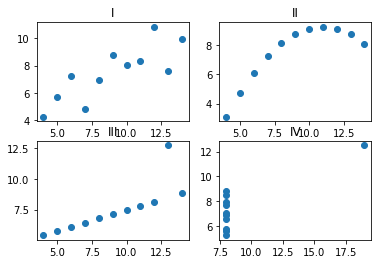

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(grupo1['x'], grupo1['y'], 'o')
axes[0, 1].plot(grupo2['x'], grupo2['y'], 'o')
axes[1, 0].plot(grupo3['x'], grupo3['y'], 'o')
axes[1, 1].plot(grupo4['x'], grupo4['y'], 'o')

# As 5 linhas acima também poderiam ter sido criadas primeiro criando um
# objeto Figure e depois adicionando os subplots a ela. Entretanto isso 
# não está funcionando na configuração do meu jupyter notebook. 
# Nesse caso o código seria assim:

# fig = plt.figure()

# axes1 = fig.add_suplot(2, 2, 1)
# axes2 = fig.add_suplot(2, 2, 2)
# axes3 = fig.add_suplot(2, 2, 3)
# axes4 = fig.add_suplot(2, 2, 4)

# axes1.plot(grupo1['x'], grupo1['y'], 'o')
# axes2.plot(grupo2['x'], grupo2['y'], 'o')
# axes3.plot(grupo3['x'], grupo3['y'], 'o')
# axes4.plot(grupo4['x'], grupo4['y'], 'o')

axes[0, 0].set_title('I')
axes[0, 1].set_title('II')
axes[1, 0].set_title('III')
axes[1, 1].set_title('IV')

Importante destacar que o matplotlib chama de **axes** a área em que tudo é plotado e **axis** os eixos da figura.

## Seção 3.3 - Gráficos estatísticos usando a matplotlib

Essa seção usa a base de dados de gorjeta da biblioteca seaborn.

In [4]:
tips = sns.load_dataset('tips')
print(tips.head())
print(tips.shape)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
(244, 7)


Cada observação tem informações sobre o valor total da conta, o valor da gorjeta, o gênero da/do atendente, se é fumante ou não, o dia da semana, a hora e o tamanho do grupo de pessoas atendido.

Para iniciar, vamos checar o histograma do total da conta:

Text(0, 0.5, 'Valor da conta')

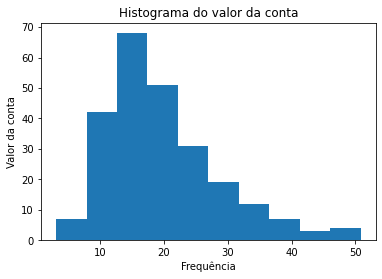

In [5]:
fig, ax = plt.subplots()
ax.hist(tips['total_bill'], bins=10)
ax.set_title('Histograma do valor da conta')
ax.set_xlabel('Frequência')
ax.set_ylabel('Valor da conta')

Vamos agora plotar como o valor da gorjeta varia com o total da conta usando um gráfico de dispersão:

Text(0, 0.5, 'Gorjeta')

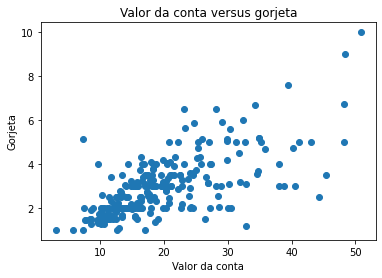

In [6]:
fig, ax = plt.subplots()
ax.scatter(tips['total_bill'], tips['tip'])
ax.set_title('Valor da conta versus gorjeta')
ax.set_xlabel('Valor da conta')
ax.set_ylabel('Gorjeta')


Vamos criar um boxplot de acordo com o gênero da/do atendente:

Text(0.5, 1.0, 'Boxplot de gorjeta por gênero')

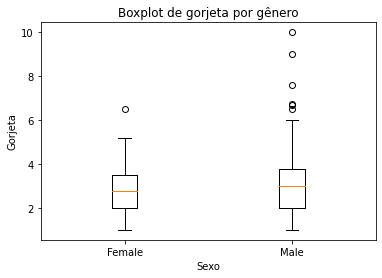

In [7]:
fig, ax = plt.subplots()
ax.boxplot(
    [
        tips[tips['sex'] == 'Female']['tip'],
        tips[tips['sex'] == 'Male']['tip'],
    ],
    labels=['Female', 'Male']
)
ax.set_xlabel('Sexo')
ax.set_ylabel('Gorjeta')
ax.set_title('Boxplot de gorjeta por gênero')

O gráfico de dispersão possui funcionalidades para colorir os pontos e alterar o tamanho do ponto, o que permite mostrar mais de uma variável. Por exemplo, a figura abaixo mostra o valor da conta em função da gorjeta. Entretanto o gênero é indicado pela cor dos pontos e o tamanho do grupo é representado pela área do ponto.

Text(0, 0.5, 'Gorjeta')

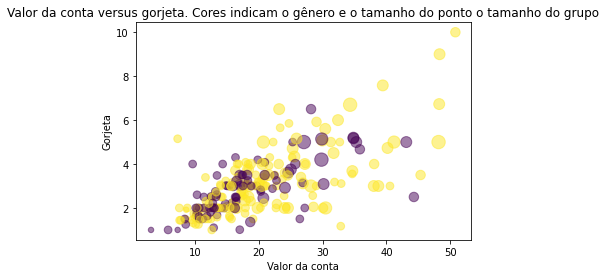

In [8]:
def recode_sex(sex):
    return 0 if sex == 'Female' else 1

tips['sex_color'] = tips['sex'].apply(recode_sex)

fig, ax = plt.subplots()
ax.scatter(x=tips['total_bill'], y=tips['tip'], s=tips['size']*30, c=tips['sex_color'], alpha=0.5)
ax.set_title('Valor da conta versus gorjeta. Cores indicam o gênero e o tamanho do ponto o tamanho do grupo')
ax.set_xlabel('Valor da conta')
ax.set_ylabel('Gorjeta')

## Seção 3.4 - Seaborn

O seaborn é uma biblioteca de visualização de dados baseada no Matplotlib. A ideia é facilitar a criação de gráficos estatísticos, criando versões mais bonitas. Permite ajuste fino usando os métodos do Matplotlib e se integra com o restante da pilha PyData (numpy, pandas, scypy, statsmodels).

Para iniciar, vamos criar um histograma de densidade com uma linha estimando a densidade (kde: kernel density estimator = True). Vamos criar algumas versões diferentes do mesmo histograma, mas usando outros parâmetros.

<AxesSubplot:xlabel='total_bill', ylabel='Probability'>

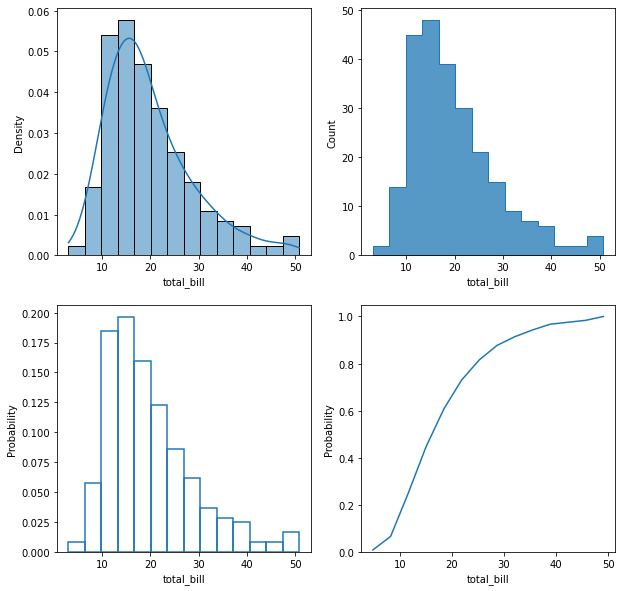

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(tips['total_bill'], stat='density', kde=True, ax=ax[0, 0])
sns.histplot(tips['total_bill'], stat='count', kde=False, element="step", ax=ax[0, 1])
sns.histplot(tips['total_bill'], stat='probability', fill=False, kde=False, ax=ax[1, 0])
sns.histplot(tips['total_bill'], stat='probability', cumulative=True, fill=False, element="poly", ax=ax[1, 1])



Seaborn possui um gráfico de contador que faz a contagem dos dados por categoria. É semelhante ao histograma:

C:\Users\caris\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequência')

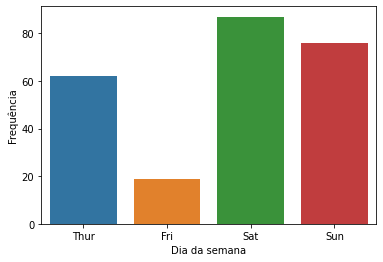

In [10]:
fig, ax = plt.subplots()

ax = sns.countplot('day', data=tips)
ax.set_xlabel('Dia da semana')
ax.set_ylabel('Frequência')

Para um gráfico de dispersão usamos o método _regplot_, que faz a plotagem dos dados e ainda cria uma linha de regressão.

Text(0, 0.5, 'Gorjeta')

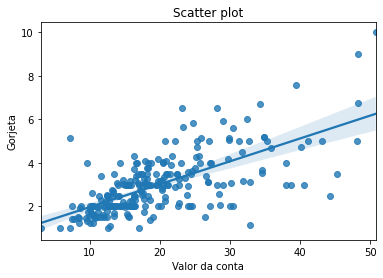

In [11]:
fig, ax = plt.subplots()

ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatter plot')
ax.set_xlabel('Valor da conta')
ax.set_ylabel('Gorjeta')

Funcionalidade bastante interessante é fornecida pela função jointplot:

Text(0.5, 1.03, 'Joint plot of total bill and tip')

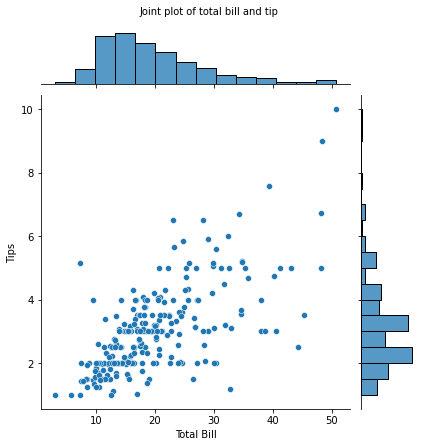

In [12]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tips')
joint.fig.suptitle('Joint plot of total bill and tip', fontsize=10, y=1.03)

Quando um gráfico de dispersão possui muitos pontos, podemos usar cores de hexágonos para representar a densidade de pontos sem a sobreposição deles:

Text(0.5, 1.03, 'Joint plot of total bill and tip')

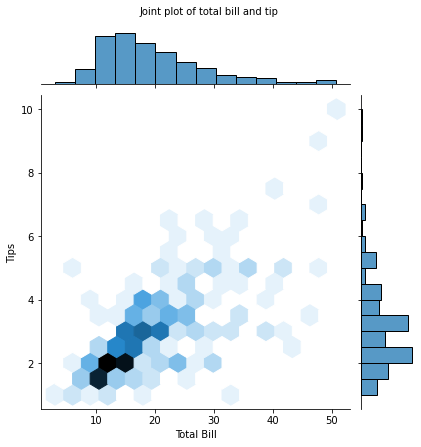

In [13]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tips')
joint.fig.suptitle('Joint plot of total bill and tip', fontsize=10, y=1.03)

Algo semelhante pode ser feito criando manchas de densidade 2D:

C:\Users\caris\Anaconda3\lib\site-packages\seaborn\distributions.py:1641: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


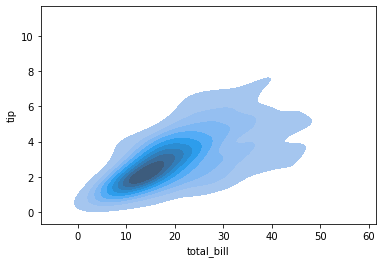

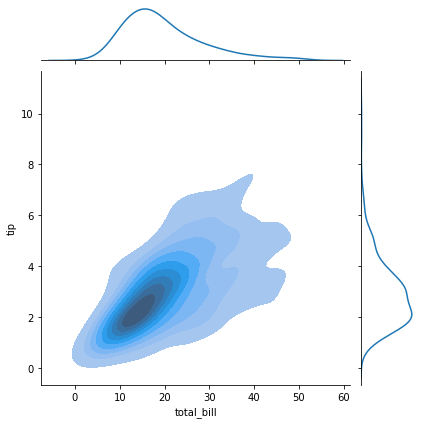

In [14]:
fig, ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'], data2=tips['tip'], shade=True)
plt.show()

kde_joint = sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde', shade=True)

É possível plotar gráficos de barra agregando por grupos e aplicando funções agregadoras:


<AxesSubplot:xlabel='time', ylabel='total_bill'>

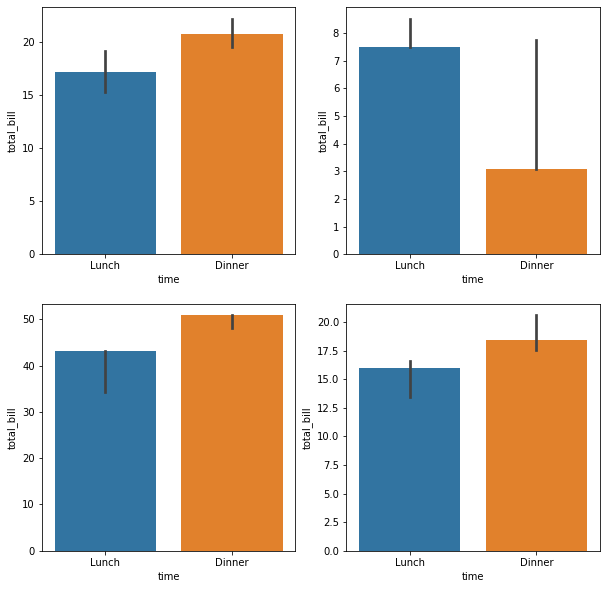

In [15]:
from numpy import max, min, median

fig, ax = plt.subplots(2, 2, figsize=(10,10))

sns.barplot(x='time', y='total_bill', data=tips, ax=ax[0,0])
sns.barplot(x='time', y='total_bill', data=tips, ax=ax[0,1], estimator=min)
sns.barplot(x='time', y='total_bill', data=tips, ax=ax[1,0], estimator=max)
sns.barplot(x='time', y='total_bill', data=tips, ax=ax[1,1], estimator=median)

Boxplots e gráficos de violino também são facilmente desenhados:

<AxesSubplot:xlabel='time', ylabel='total_bill'>

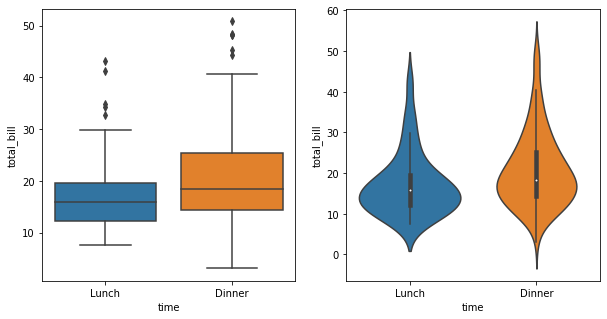

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

sns.boxplot(x='time', y='total_bill', data=tips, ax=ax[0])
sns.violinplot(x='time', y='total_bill', data=tips, ax=ax[1])

Um gráfico de dispersão entre cada par de variável numérica pode ser rapidamente plotado usando a função pairplot.

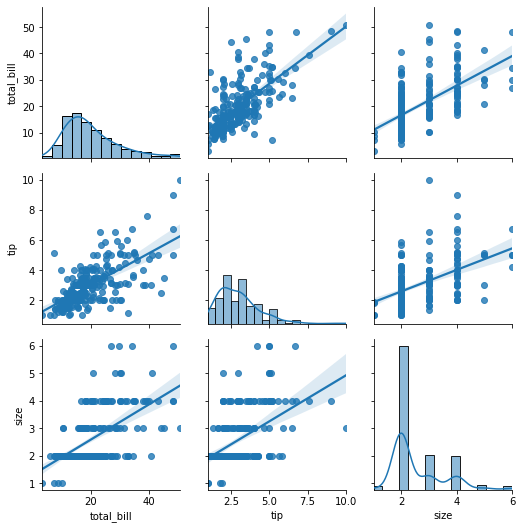

In [17]:
pair_grid = sns.PairGrid(tips[['total_bill', 'tip', 'size']])
pair_grid.map_upper(sns.regplot)
pair_grid.map_lower(sns.regplot)
pair_grid.map_diag(sns.histplot, kde=True)

Em alguns tipos de gráficos, podemos usar o parâmetro hue para fazer a separação por classes. Por exemplo:

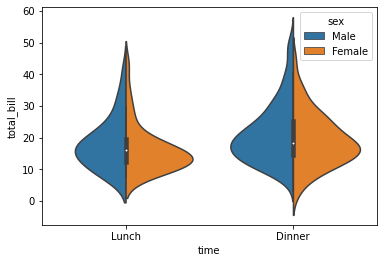

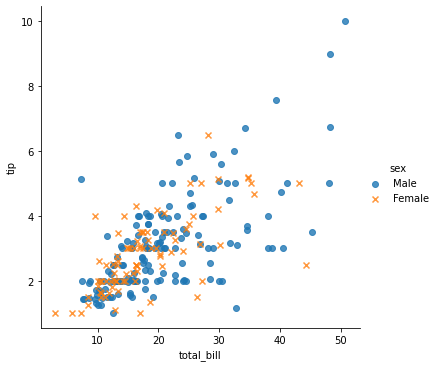

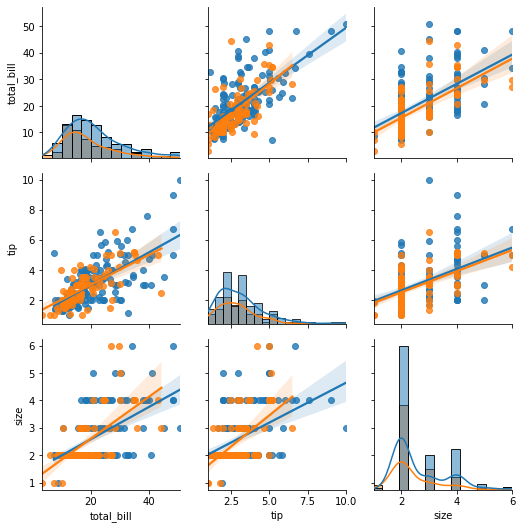

In [18]:
sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

sns.lmplot(x='total_bill', y='tip', hue='sex', markers=['o', 'x'], data=tips, fit_reg=False)

pair_grid = sns.PairGrid(tips[['total_bill', 'tip', 'size', 'sex']], hue='sex')
pair_grid.map_upper(sns.regplot)
pair_grid.map_lower(sns.regplot)
pair_grid.map_diag(sns.histplot, kde=True)

Em algumas funções (que atuam sobre o Figure do matplotlib em vez do Axes) os dados podem ser agrupados automaticamente (facetados) usando o parâmetro col:

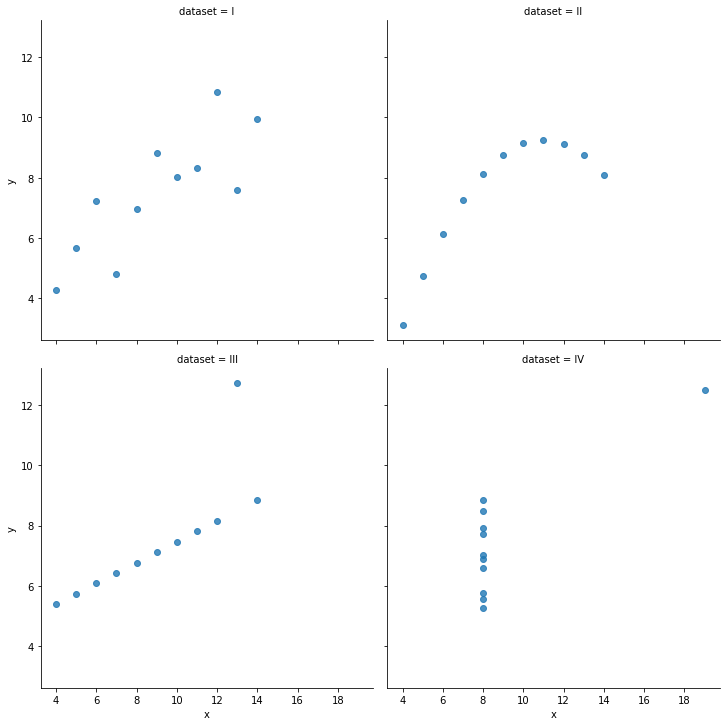

In [19]:
sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False, col='dataset', col_wrap=2)